# Minichallenge SAN - HS24

# Das Soziale Netzwerk schlägt zurück
Von Haris Alic, Lukas Zemp und Kevin Wartmann

## 1 Datensatz

Der Datensatz, den wir für die Challenge verwendet haben, war der "Star Wars Social Network" Datensatz von Kaggle. Der Datensatz besteht aus 25 Datensätzen, wobei nicht alle verwendet wurden. Die Datensätze sind im Json Format und enthalten die Charaktere der Filme 1-7. Die Datensätze sind nach Filmen unterteilt, es gibt aber auch Datensätze mit allen Charakteren. Für die Gewichtung des Netzwerkes gibt es die Datensätze "mentions" (Erwähnungen) oder "interactions" (Interaktionen). <br>
Datensatz: https://www.kaggle.com/datasets/ruchi798/star-wars

## 2 Explorative Datenanalyse

In [6]:
from utils import load_json
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# imports
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import plots ???
import importlib
import utils

### Full interactions all characters

In [16]:
full_interaction_data = utils.load_json("data/starwars-full-interactions-allCharacters.json")
full_mention_data = utils.load_json("data/starwars-full-mentions.json")

In [23]:
int_nodes = full_interaction_data.get("nodes", [])
int_links = full_interaction_data.get("links", [])
ment_nodes = full_mention_data.get("nodes", [])
ment_links = full_mention_data.get("links", [])

int_nodes_df = pd.DataFrame(int_nodes)
int_links_df = pd.DataFrame(int_links)
ment_nodes_df = pd.DataFrame(ment_nodes)
ment_links_df = pd.DataFrame(ment_links)

In [25]:
print("Fehlende Werte interaction nodes:")
print(int_nodes_df.isnull().sum())
print("\nFehlende Werte interaction links:")
print(int_links_df.isnull().sum())

print("\nFehlende Werte mention nodes:")
print(ment_nodes_df.isnull().sum())
print("\nFehlende Werte mention links:")
print(ment_links_df.isnull().sum())

Fehlende Werte interaction nodes:
name      0
value     0
colour    0
dtype: int64

Fehlende Werte interaction links:
source    0
target    0
value     0
dtype: int64

Fehlende Werte mention nodes:
name      0
value     0
colour    0
dtype: int64

Fehlende Werte mention links:
source    0
target    0
value     0
dtype: int64


In [30]:
print("Duplikate bei interaction nodes:")
print(int_nodes_df.duplicated().sum())
print("\nDuplikate be interaction links:")
print(int_links_df.duplicated().sum())

print("\nDuplikate bei mentions nodes:")
print(ment_nodes_df.duplicated().sum())
print("\nDuplikate bei mentions links:")
print(ment_links_df.duplicated().sum())

Duplikate bei interaction nodes:
0

Duplikate be interaction links:
0

Duplikate bei mentions nodes:
0

Duplikate bei mentions links:
0


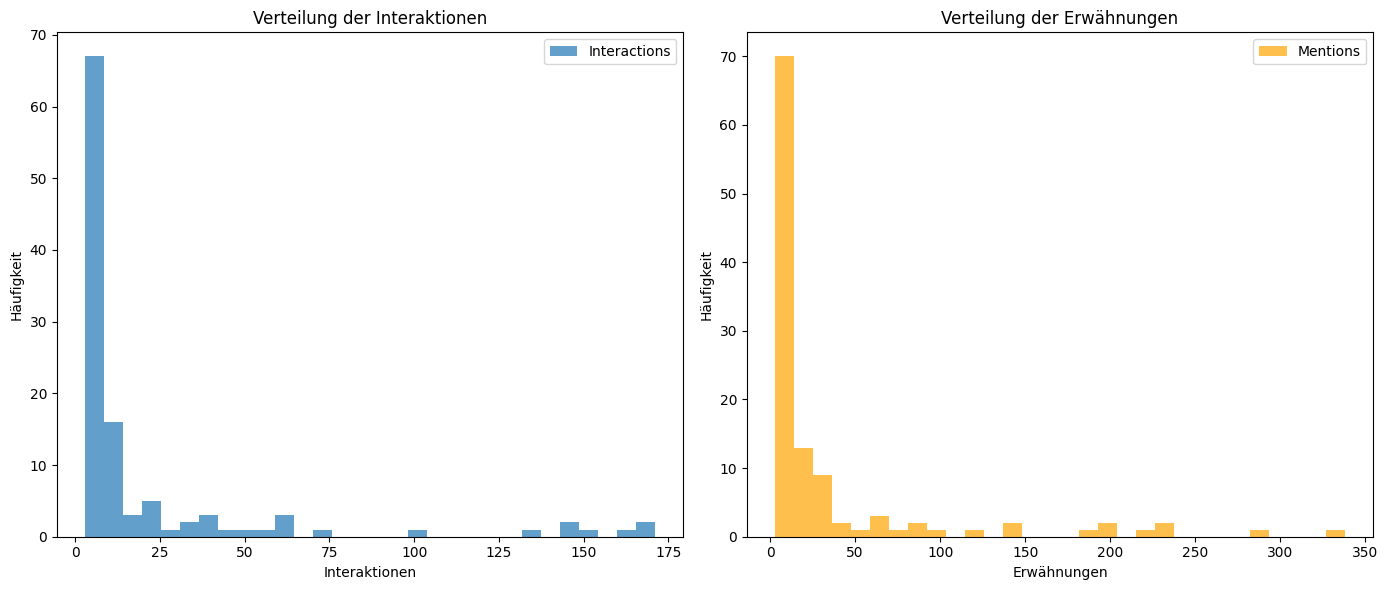

In [31]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(int_nodes_df["value"], bins=30, alpha=0.7, label="Interactions")
plt.title("Verteilung der Interaktionen")
plt.xlabel("Interaktionen")
plt.ylabel("Häufigkeit")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ment_nodes_df["value"], bins=30, alpha=0.7, color="orange", label="Mentions")
plt.title("Verteilung der Erwähnungen")
plt.xlabel("Erwähnungen")
plt.ylabel("Häufigkeit")
plt.legend()
plt.tight_layout()
plt.show()

## 3 Communities

Im Star Wars-Universum treibt der Imperator seine Pläne voran, die gesamte Galaxie unter seine Kontrolle zu bringen. Unsere Aufgabe ist es, ihn dabei zu unterstützen, indem wir die Gegner analysieren, zentrale Figuren identifizieren und gezielt ausschalten. <br>
Um dies zu erreichen, setzen wir auf Clustering-Methoden, die uns helfen, die Netzwerke seiner Feinde zu durchleuchten. Wir vergleichen zwei Ansätze: **Louvain** und **Label Propagation**. Anhand der Ergebnisse entscheiden wir, welcher Algorithmus für unsere Ziele am effektivsten ist.


### 3.1 Cliquen

### 3.2 N-Core

### 3.3 Clustering

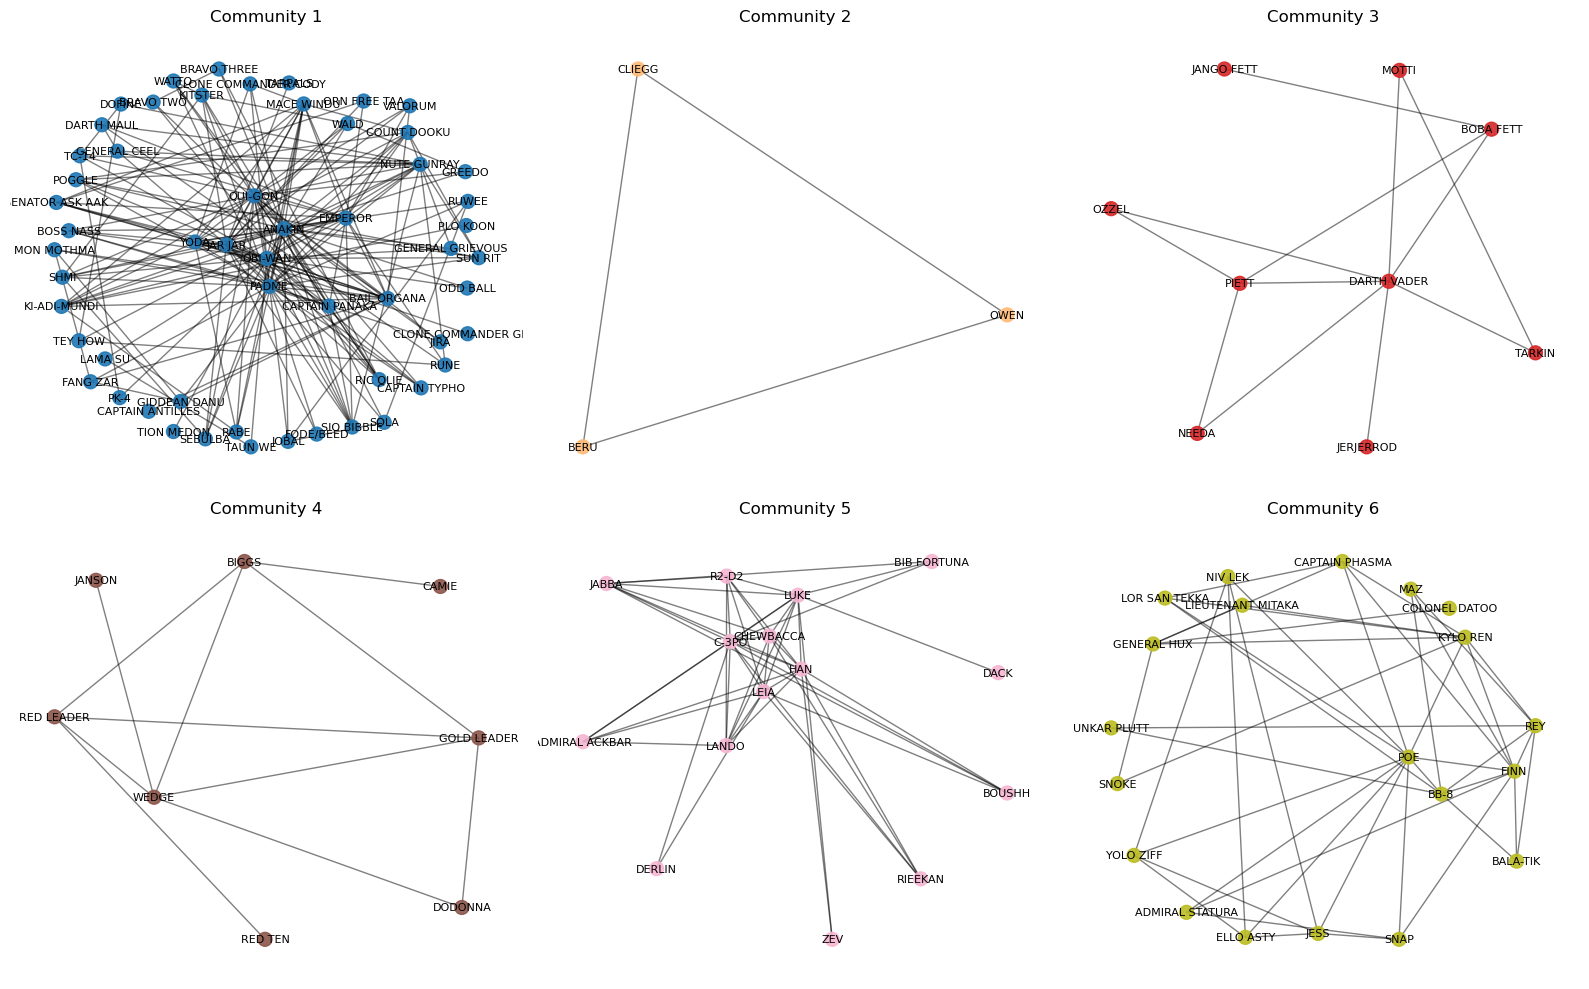

In [32]:
importlib.reload(plots)

plots.plot_louvain_communities("data/starwars-full-interactions-allCharacters.json")

In [33]:
import utils
importlib.reload(utils)

community_affiliations = utils.load_json("data/community_affiliations.json")

utils.format_text(community_affiliations)

FileNotFoundError: [Errno 2] No such file or directory: 'data/community_affiliations.json'

## 4 Zentralitätsmasse

### 4.1 Closeness

In [30]:
importlib.reload(plots)

plots.plot_top_nodes_by_community(
    "starwars-full-interactions-allCharacters.json",
    centrality_type="closeness",
    top_n=3,
)

FileNotFoundError: [Errno 2] No such file or directory: 'starwars-full-interactions-allCharacters.json'

### 4.2 Betweenness

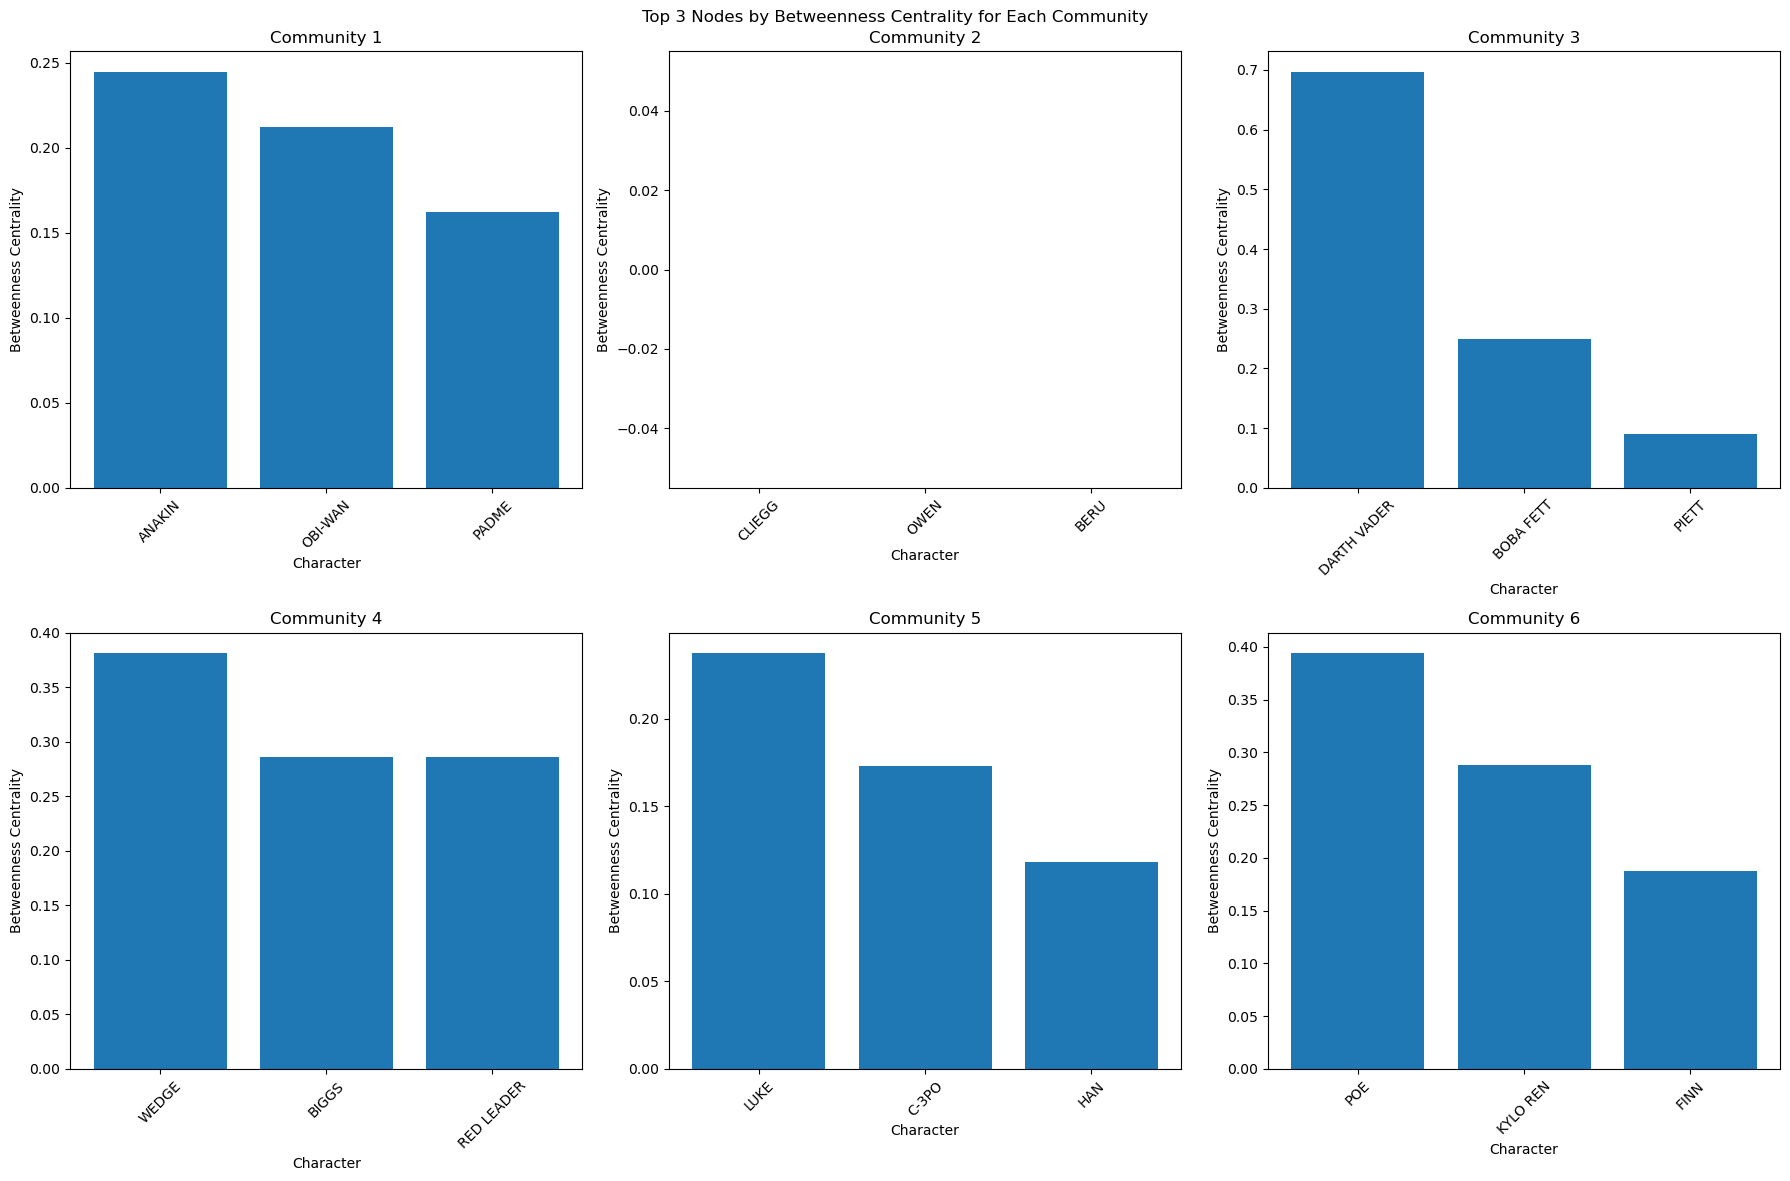

In [19]:
importlib.reload(plots)

plots.plot_top_nodes_by_community(
    "starwars-full-interactions-allCharacters.json",
    centrality_type="betweenness",
    top_n=3,
)

## 5 Link Prediction 

Leider haben nicht nur wir Data Scientists auf unserer Seite, sondern auch der Imperator hat ein Team, welches sich gut mit Sozialer Netzwerkanalyse auskennt. 

Um die Reichweite des Imperators in seinem Sozialen Netzwerk zu vergrössern, verwenden sie eine Link Prediction. Somit wollen sie für nicht-verbundene Knoten eine passende Verbindung finden, um das Netzwerk zu vergrössern. Die Link-predictions werden auf das gesammte Netzwerk angewendet unsd nicht nur auf einen bestimmten Knoten. So kann der Imperator über das ganze Netzwerk hinweg sehen, wo sich in naher Zukunft eine Verbindung bilden könnte. 

In [1]:
with open('data/starwars-episode-1-interactions-allCharacters.json') as f:
    data_interactions = json.load(f)

# Graph erstellen
G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)

print(G)

Graph with 38 nodes and 135 edges


### 5.1 Common Neighbours

Common Neighbours ist eine Methode der Link Prediction die misst, wie viele gemeinsame Nachbarn zwei Knoten haben. Je mehr gemeinsame Nachbarn vorhanden sind, desto höher ist die Wahrscheinlichkeit, dass zwischen den beiden Knoten eine neue Verbindung entsteht.

Die Formel dazu lautet: 

$$
\text{common\_neighbours}(X, Y) = \bigl| N(X) \cap N(Y) \bigr|
$$

Wobei N die Anzahl Nachbarn angibt. 

In [2]:
# Link-Prediction mit Common Neighbours
potential_links = []
nodes = list(G.nodes())
n = len(nodes)

for i in range(n):
    for j in range(i+1, n):
        u = nodes[i]
        v = nodes[j]
        if not G.has_edge(u, v):
            cn_count = len(list(nx.common_neighbors(G, u, v)))
            if cn_count > 0:
                potential_links.append((u, v, cn_count))

potential_links.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Common Neighbours mit Namen:")
for u, v, score in potential_links[:10]:
    print(f"{u} - {v}: gemeinsame Nachbarn = {score}")


Top 10 Link Predictions basierend auf Common Neighbours mit Namen:
NUTE GUNRAY - JAR JAR: gemeinsame Nachbarn = 5
OBI-WAN - EMPEROR: gemeinsame Nachbarn = 5
OBI-WAN - SEBULBA: gemeinsame Nachbarn = 5
OBI-WAN - KITSTER: gemeinsame Nachbarn = 5
OBI-WAN - JABBA: gemeinsame Nachbarn = 5
OBI-WAN - RABE: gemeinsame Nachbarn = 5
CAPTAIN PANAKA - SHMI: gemeinsame Nachbarn = 5
SIO BIBBLE - BOSS NASS: gemeinsame Nachbarn = 5
SIO BIBBLE - ANAKIN: gemeinsame Nachbarn = 5
BOSS NASS - RIC OLIE: gemeinsame Nachbarn = 5


In [12]:
# Welcher NOde kommt wie oft vor in den top 10
top_nodes = [u for u, _, _ in potential_links[:10]]
top_nodes += [v for _, v, _ in potential_links[:10]]
top_nodes = dict.fromkeys(top_nodes, 0)

for u, v, _ in potential_links[:10]:
    top_nodes[u] += 1
    top_nodes[v] += 1

print("Häufigkeit der Top 10 Nodes in Link Predictions:")

for node, count in sorted(top_nodes.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {count}")

Häufigkeit der Top 10 Nodes in Link Predictions:
OBI-WAN: 5
SIO BIBBLE: 2
BOSS NASS: 2
NUTE GUNRAY: 1
CAPTAIN PANAKA: 1
JAR JAR: 1
EMPEROR: 1
SEBULBA: 1
KITSTER: 1
JABBA: 1
RABE: 1
SHMI: 1
ANAKIN: 1
RIC OLIE: 1


Unter den Top 10 Link predictions mittels Common Neighbours, haben alle den gleichen Score. Besonders häfig ist Obi-Wan in den top Link Predictions vertreten, was Sinn macht, da er einer der Hauptfiguren aus Star Wars ist. 

Nun wollen wir die predicteten Links noch visuell darstellen. 

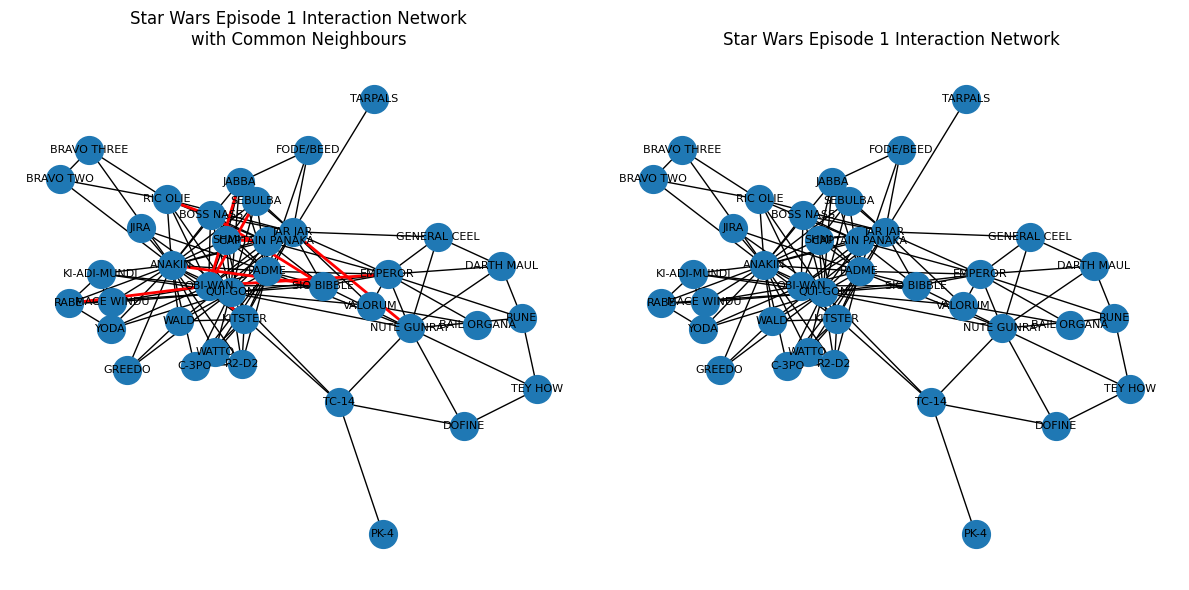

Graph with 38 nodes and 135 edges


In [3]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)

# Abmessungen für den Plot
plt.figure(figsize=(12, 6))

# Plot 1: Netzwerk mit Link Prediction (Common Neighbours)
plt.subplot(121)  # Erstelne von zwei Subplots
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=potential_links[:10], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Common Neighbours")

# Plot 2: Netzwerk ohne Link Prediction
plt.subplot(122)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# plot zeigen
plt.tight_layout()
plt.show()
print(G)

In der Grafik ist gut zu sehen, dass die meisten Link-predictions eher im Zentrum des Netzwerks sind. Dies macht durchaus Sinn, da dort bereits die Meisten verknüpfungen bestehen und somit durch Common Neighbours viele Predictions gemacht werden können.

### 5.2 Jaccard Coefficient

Die Jaccarcd Coefficient Metrik ist eine Erweiterung der Common Neighbours Metrik.
Sie berücksichtigt nicht nur die Anzahl gemeinsamer Nachbarn zweier Knoten, sondern
setzt diese ins Verhältnis zu der Anzahl Nachbarn beider Knoten.

Die Formel für die Jaccard Coefficient lautet wie folgt: 

$
\text{jaccard\_coefficient}(X, Y) = \frac{\lvert N(X) \cap N(Y) \rvert}{\lvert N(X) \cup N(Y) \rvert}
$

In [37]:
with open('data/starwars-episode-1-interactions-allCharacters.json') as f:
    data_interactions = json.load(f)

# Erstellen des Graphen
G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)

# Jaccard-coefficient bererechnen
jaccard_scores = list(nx.jaccard_coefficient(G))

jaccard_scores.sort(key=lambda x: x[2], reverse=True)

# Top 10 ausgeben
print("Top 10 Link Predictions basierend auf Jaccard Coefficient:")
for u, v, score in jaccard_scores[:10]:
    print(f"{u} - {v}: Jaccard = {score:.4f}")

# Graph anzeigen
print(G)

Top 10 Link Predictions basierend auf Jaccard Coefficient:
RIC OLIE - BOSS NASS: Jaccard = 0.6250
BOSS NASS - SIO BIBBLE: Jaccard = 0.6250
GENERAL CEEL - RUNE: Jaccard = 0.6000
BOSS NASS - SHMI: Jaccard = 0.5556
C-3PO - JIRA: Jaccard = 0.5000
JIRA - GREEDO: Jaccard = 0.5000
JIRA - BOSS NASS: Jaccard = 0.5000
JIRA - R2-D2: Jaccard = 0.5000
JIRA - WATTO: Jaccard = 0.5000
JIRA - SEBULBA: Jaccard = 0.5000
Graph with 38 nodes and 135 edges


In [38]:
# Welcher NOde kommt wie oft vor in den top 10
top_nodes = [u for u, _, _ in jaccard_scores[:10]]
top_nodes += [v for _, v, _ in jaccard_scores[:10]]
top_nodes = dict.fromkeys(top_nodes, 0)

for u, v, _ in jaccard_scores[:10]:
    top_nodes[u] += 1
    top_nodes[v] += 1

print("Top 10 Nodes in Link Predictions:")

for node, count in sorted(top_nodes.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {count}")

Top 10 Nodes in Link Predictions:
JIRA: 6
BOSS NASS: 4
RIC OLIE: 1
GENERAL CEEL: 1
C-3PO: 1
SIO BIBBLE: 1
RUNE: 1
SHMI: 1
GREEDO: 1
R2-D2: 1
WATTO: 1
SEBULBA: 1


Mit der Jaccard Coefficient Prediction sehen wir nun ein ganz anderes Resultat als bei der Common Neighbours Prediction. Es ist auffällig, dass der Obi Wan Charakter nun nicht mehr vorhanden ist. Dieser hat sich wohl entfernt, da er sehr viele Nachbarn hat und somit mittels Jaccard Coefficient weniger gewichtet wird. Hier werden die Charaktere "Jira" und "Boss Nass" relativ häufig mit neuen Links predicted. 

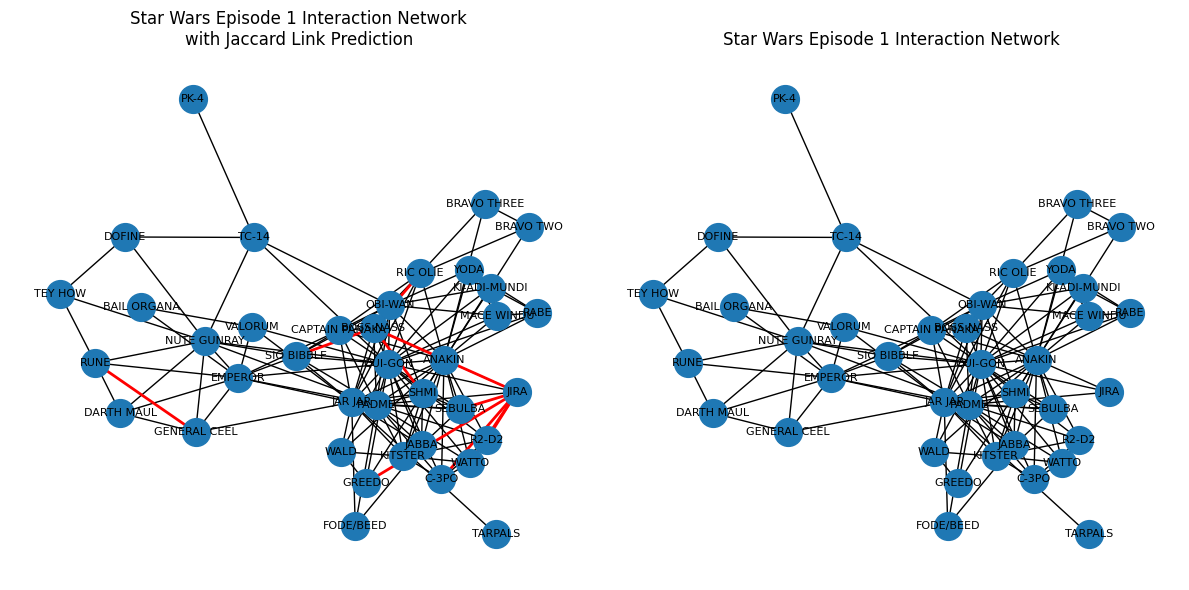

In [39]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)
 
plt.figure(figsize=(12, 6))

# Netzwerk mit Jaccard Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in jaccard_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Jaccard Link Prediction")

# Netzwerk ohne Link Prediction
plt.subplot(122)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# Abbildung anzeigen
plt.tight_layout()  
plt.show()

Hier sehen wir visuell noch, dass Boss Nass und Jira einige Predicted Links erhalten haben durch den Jaccard Coefficient. 

### 5.3 Resource Allocatoin

Der Ansatz bei der Resource Allocation basiert darauf, dass ein Knoten X Ressourcen (z. B. Informationen) über gemeinsame Nachbarn an einen nicht direkt verbundenen Knoten Z weiterleiten kann. 

X sendet die Ressource an einen gemeinsamen Nachbarn Y, der sie gleichmässig auf alle seine Nachbarn verteilt. Hat Y viele Nachbarn, erhält Z nur einen kleinen Anteil der Ressource.

Die Formel für Resource Allocaton lautet: 
$$
\text{resource\_allocation}(X, Y) = \sum_{u \in N(X) \cap N(Y)} \frac{1}{|N(u)|}
$$

In [40]:
with open('data/starwars-episode-1-interactions-allCharacters.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

# für alle links in data_interactions einen Knoten hinzufügen
for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)


# Resource Allocation
ra_scores = list(nx.resource_allocation_index(G))
ra_scores.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Resource Allocation:")
for u, v, score in ra_scores[:10]:
    print(f"{u} - {v}: RA = {score:.4f}")
print(G)

Top 10 Link Predictions basierend auf Resource Allocation:
OBI-WAN - RABE: RA = 0.5819
NUTE GUNRAY - JAR JAR: RA = 0.5778
GENERAL CEEL - RUNE: RA = 0.4409
OBI-WAN - NUTE GUNRAY: RA = 0.4369
RUNE - DOFINE: RA = 0.4333
TEY HOW - TC-14: RA = 0.4333
OBI-WAN - EMPEROR: RA = 0.4035
DARTH MAUL - TEY HOW: RA = 0.3500
EMPEROR - TEY HOW: RA = 0.3500
QUI-GON - BAIL ORGANA: RA = 0.3409
Graph with 38 nodes and 135 edges


In [41]:
# Welcher NOde kommt wie oft vor in den top 10
top_nodes = [u for u, _, _ in ra_scores[:10]]
top_nodes += [v for _, v, _ in ra_scores[:10]]
top_nodes = dict.fromkeys(top_nodes, 0)

for u, v, _ in ra_scores[:10]:
    top_nodes[u] += 1
    top_nodes[v] += 1

print("Top 10 Nodes in Link Predictions:")

for node, count in sorted(top_nodes.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {count}")

Top 10 Nodes in Link Predictions:
OBI-WAN: 3
TEY HOW: 3
NUTE GUNRAY: 2
RUNE: 2
EMPEROR: 2
GENERAL CEEL: 1
DARTH MAUL: 1
QUI-GON: 1
RABE: 1
JAR JAR: 1
DOFINE: 1
TC-14: 1
BAIL ORGANA: 1


Mit der Resource Allocation gibt es keinen Charakter, welcher auffallend häufig gelinkt wird. Obi-Wan und Tey How haben hier die meisten Links erhalten, allerdings sind es jeweils nur drei. 

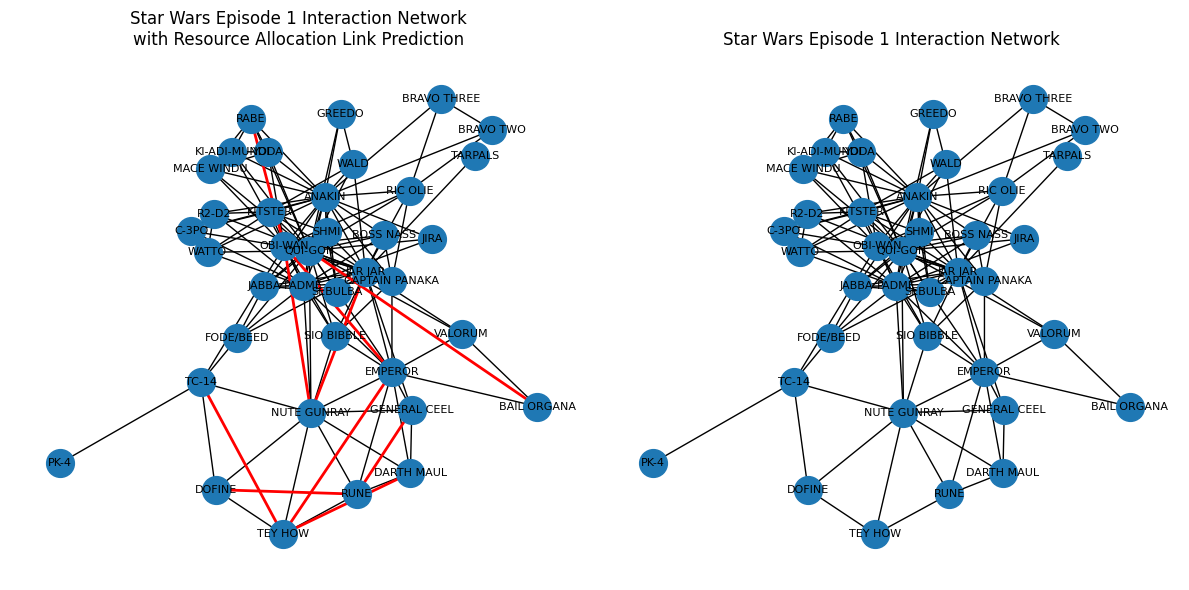

In [42]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 6))

# Netzwerk mit RA Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in ra_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Resource Allocation Link Prediction")

# Netzwerk ohne Link Prediction
plt.subplot(122) 
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# plot anzeigen
plt.tight_layout() 
plt.show()

### 5.4 Ademic Adar

Diese Metrik berechnet sich fast genau gleich wie Resource Allocation. Der einzige
Unterschied ist, dass das Gewicht des Nenners abgeschwächt wird, indem da der Loga-
rithmus verwendet wird:

$$
\text{adamic\_adar}(X, Y) = \sum_{u \in N(X) \cap N(Y)} \frac{1}{\ln(|N(u)|)}
$$

Da die Metrik sehr ähnlich zu Resource Allocation ist, erwarten wir hier ein ähnliches Resultat. 

In [43]:
with open('data/starwars-episode-1-interactions-allCharacters.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)


# Adamic-Adar
aa_scores = list(nx.adamic_adar_index(G))
aa_scores.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Adamic-Adar:")
for u, v, score in aa_scores[:10]:
    print(f"{u} - {v}: Adamic-Adar = {score:.4f}")

print(G)

Top 10 Link Predictions basierend auf Adamic-Adar:
NUTE GUNRAY - JAR JAR: Adamic-Adar = 2.3052
OBI-WAN - RABE: Adamic-Adar = 2.3002
OBI-WAN - EMPEROR: Adamic-Adar = 1.9679
BOSS NASS - SIO BIBBLE: Adamic-Adar = 1.8439
ANAKIN - SIO BIBBLE: Adamic-Adar = 1.8439
RIC OLIE - BOSS NASS: Adamic-Adar = 1.8168
RIC OLIE - PADME: Adamic-Adar = 1.8168
JABBA - KITSTER: Adamic-Adar = 1.7987
KITSTER - SEBULBA: Adamic-Adar = 1.7987
OBI-WAN - JABBA: Adamic-Adar = 1.7987
Graph with 38 nodes and 135 edges


In [44]:
# Welcher NOde kommt wie oft vor in den top 10
top_nodes = [u for u, _, _ in aa_scores[:10]]
top_nodes += [v for _, v, _ in aa_scores[:10]]
top_nodes = dict.fromkeys(top_nodes, 0)

for u, v, _ in aa_scores[:10]:
    top_nodes[u] += 1
    top_nodes[v] += 1

print("Top 10 Nodes in Link Predictions:")

for node, count in sorted(top_nodes.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {count}")

Top 10 Nodes in Link Predictions:
OBI-WAN: 3
BOSS NASS: 2
RIC OLIE: 2
JABBA: 2
KITSTER: 2
SIO BIBBLE: 2
NUTE GUNRAY: 1
ANAKIN: 1
JAR JAR: 1
RABE: 1
EMPEROR: 1
PADME: 1
SEBULBA: 1


Wie bei Resource Allocation zeigt auch die Ademic Adar Metrik drei link Predictions für Obi-Wan. Allerdings ist hier der Charakter "Tey How" nicht mehr vertreten. Dies ist erstaunlich, da die Metrik fast gleich funktioniert wie die Resource Allocation. 

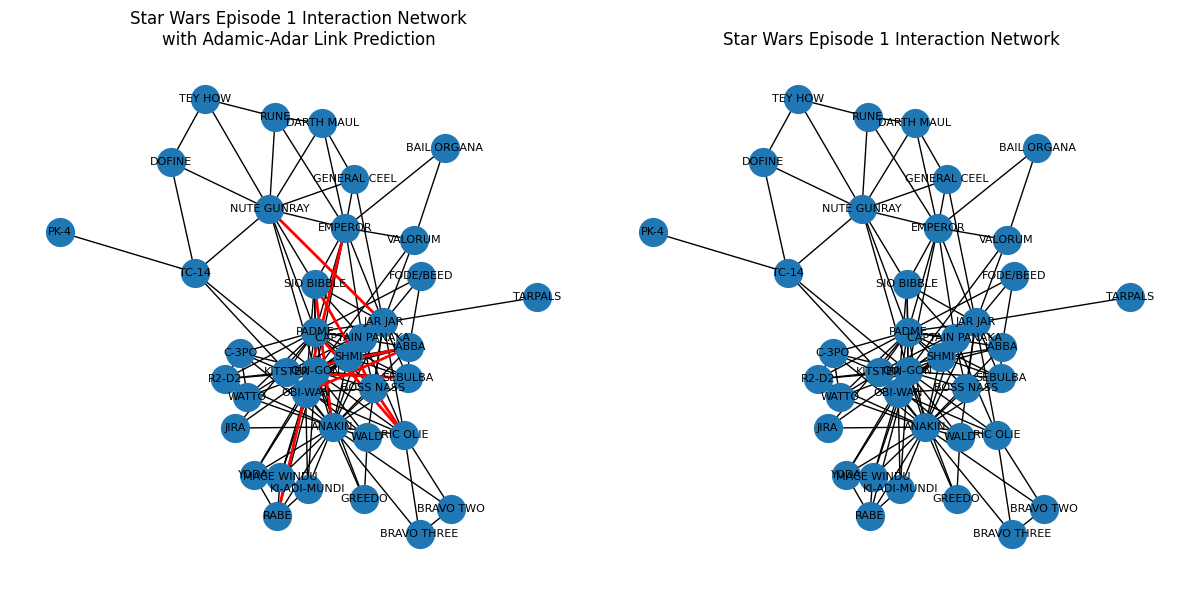

In [45]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 6))

# Netzwerk mit Adamic-Adar Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in aa_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Adamic-Adar Link Prediction")

# Netzwerk ohne Link Prediction
plt.subplot(122)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# plot anzeigen
plt.tight_layout() 
plt.show()

### 5.5 Sind Links zustande gekommen?

Um die Linkpredictions noch zu pfüfen, schauen wir uns im Datensatz mit allen 7 Filmen an, ob eine von den Predictions wahr geworden ist, respektive ob eine der vorgeschlagenen Connections in einem späteren Film tatsächlich zustande gekommen ist. 

Dazu verwenden wir von allen Metriken die jeweils beste Vorhersagen. 

#### Höchste Wahrscheinlichkeit pro Link Prediction: 

Common Neighbours: NUTE GUNRAY - JAR JAR: gemeinsame Nachbarn = 5

Jaccard Coefficient: RIC OLIE - BOSS NASS: Jaccard = 0.6250

Resource Allocation: OBI-WAN - RABE: RA = 0.5855

Ademic Adar: NUTE GUNRAY - JAR JAR: Adamic-Adar = 2.3159 - gleiche wie bei Common Neighbours

In [72]:
with open('data/starwars-full-interactions-allCharacters-merged.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

# connections für Links hinzufügen
for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)

# checken, ob es verbindungen gibt
print(f"Connection between NUTE GUNRAY and JAR JAR: {G.has_edge('NUTE GUNRAY', 'JAR JAR')}")
print(f"Connection between RIC OLIE and BOSS  NASS: {G.has_edge('RIC OLIE', 'BOSS NASS')}")
print(f"Connection between NUTE OBI-WAN and RABE: {G.has_edge('OBI-WAN', 'RABE')}")
print(G)

Connection between NUTE GUNRAY and JAR JAR: False
Connection between RIC OLIE and BOSS  NASS: False
Connection between NUTE OBI-WAN and RABE: False
Graph with 111 nodes and 444 edges


Anscheinend, sind diese Link-predictions nicht ganz so gut gewesen, denn aus den drei besten Predictions ist keine wirklich so entstanden. 

Um zu prüfen, ob es sonst Links gibt, welche in den späteren Filmen entstanden sind, printen wir noch ein paar Connections mehr, welche von den Link-Prediction Methoden vorhergesagt wurden.

In [47]:
print(f"Connection between OBI-WAN and EMPEROR: {G.has_edge('OBI-WAN', 'EMPEROR')}")
print(f"Connection between ANAKIN and SIO BIBBLE: {G.has_edge('ANAKIN', 'SIO BIBBLE')}")
print(f"Connection between JABBA and KITSTER: {G.has_edge('JABBA', 'KITSTER')}")
print(f"Connection between RIC OLIE and PADME: {G.has_edge('RIC OLIE', 'PADME')}")
print(f"Connection between OBI-WAN and JABBA: {G.has_edge('OBI-WAN', 'JABBA')}")

Connection between OBI-WAN and EMPEROR: True
Connection between ANAKIN and SIO BIBBLE: False
Connection between JABBA and KITSTER: False
Connection between RIC OLIE and PADME: False
Connection between OBI-WAN and JABBA: False


Die einzige tatsächliche Interaktion, welche wir feststellen konnten ist die zwischen Obi-Wan und dem Emperor. 

### 5.6 Link-Predictions auf mentions mit Common Neighbours

Nun führen wir die Link-predictions auch noch auf die Datensätze mit den Mentions durch um zu sehen, wie die Erwähnungen vorhergesagt werden und ob es nennenswerte Unterschiede gibt zu den Daten mit den Interaktionen. 

In [48]:
with open('data/starwars-episode-1-mentions.json') as f:
    data_interactions = json.load(f)

# Graph erstellen
G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)

print(G)

Graph with 38 nodes and 244 edges


Hier ist bereits zu sehen, dass dieses Netzwerk zwar auch 38 Nodes hat, aber dafür viel mehr edges, als das Netzwerk der Interaktionen. Das ist durchaus nachvollziehbar, da hier auch Links zu Charakteren dabei sind, welche "nur" erwähnt wurden und keine tatsächliche Interaktion hatten. Bei dem Netzwerk der Interaktionen waren es "nur" jeweils 135 Edges, wobei es hier schon 244 sind. 

In [49]:
# Link-Prediction mit Common Neighbours
potential_links = []
nodes = list(G.nodes())
n = len(nodes)

for i in range(n):
    for j in range(i+1, n):
        u = nodes[i]
        v = nodes[j]
        if not G.has_edge(u, v):
            cn_count = len(list(nx.common_neighbors(G, u, v)))
            if cn_count > 0:
                potential_links.append((u, v, cn_count))

potential_links.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Common Neighbours mit Namen:")
for u, v, score in potential_links[:10]:
    print(f"{u} - {v}: gemeinsame Nachbarn = {score}")

Top 10 Link Predictions basierend auf Common Neighbours mit Namen:
NUTE GUNRAY - ANAKIN: gemeinsame Nachbarn = 11
YODA - R2-D2: gemeinsame Nachbarn = 11
RUNE - ANAKIN: gemeinsame Nachbarn = 11
CAPTAIN PANAKA - GENERAL CEEL: gemeinsame Nachbarn = 11
SIO BIBBLE - DARTH MAUL: gemeinsame Nachbarn = 11
PADME - GENERAL CEEL: gemeinsame Nachbarn = 11
NUTE GUNRAY - BOSS NASS: gemeinsame Nachbarn = 10
NUTE GUNRAY - R2-D2: gemeinsame Nachbarn = 10
RUNE - BOSS NASS: gemeinsame Nachbarn = 10
RUNE - R2-D2: gemeinsame Nachbarn = 10


Im Gegensatz zu dem Netzwerk mit den Interaktionen, gibt es hier mehr Common Neighbours. In der Link-prediction der Interaktionen gab es für die Top 10 Predictions nur fünf Common Neighbours, wobei es hier bei den meisten schon 11 Common Neighbours sind. 

In [50]:
# Welcher NOde kommt wie oft vor in den top 10
top_nodes = [u for u, _, _ in potential_links[:10]]
top_nodes += [v for _, v, _ in potential_links[:10]]
top_nodes = dict.fromkeys(top_nodes, 0)

for u, v, _ in potential_links[:10]:
    top_nodes[u] += 1
    top_nodes[v] += 1

print("Top 10 Nodes in Link Predictions:")

for node, count in sorted(top_nodes.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {count}")

Top 10 Nodes in Link Predictions:
NUTE GUNRAY: 3
RUNE: 3
R2-D2: 3
ANAKIN: 2
GENERAL CEEL: 2
BOSS NASS: 2
YODA: 1
CAPTAIN PANAKA: 1
SIO BIBBLE: 1
PADME: 1
DARTH MAUL: 1


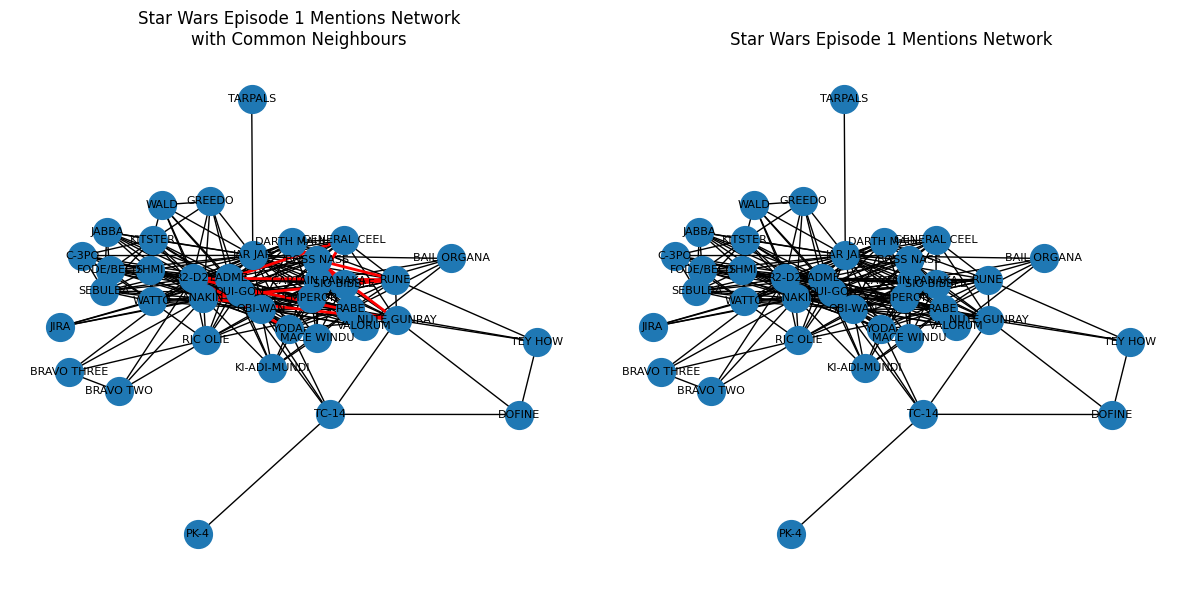

Graph with 38 nodes and 244 edges


In [51]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)

# Abmessungen für den Plot
plt.figure(figsize=(12, 6))

# Netzwerk mit Link Prediction (Common Neighbours)
plt.subplot(121) 
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=potential_links[:10], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Mentions Network\nwith Common Neighbours")

# Netzwerk ohne Link Prediction
plt.subplot(122)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Mentions Network")

# plot zeigen
plt.tight_layout()
plt.show()
print(G)

Die Plots für die Mentions Netzwerke sind schon viel unübersichtlicher als die bei den Interaktionen. Dies liegt daran, dass es hier viel mehr Edges gibt als im oberen Netzwerk.  

### 5.7 Link-Predictions auf mentions mit Jaccard Coefficioen


In [52]:
with open('data/starwars-episode-1-mentions.json') as f:
    data_interactions = json.load(f)

# Erstellen des Graphen
G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)

# Jaccard-coefficient bererechnen
jaccard_scores = list(nx.jaccard_coefficient(G))

jaccard_scores.sort(key=lambda x: x[2], reverse=True)

# Top 10 ausgeben
print("Top 10 Link Predictions basierend auf Jaccard Coefficient:")
for u, v, score in jaccard_scores[:10]:
    print(f"{u} - {v}: Jaccard = {score:.4f}")

# Graph anzeigen
print(G)

Top 10 Link Predictions basierend auf Jaccard Coefficient:
C-3PO - FODE/BEED: Jaccard = 0.8182
C-3PO - JABBA: Jaccard = 0.8000
SIO BIBBLE - DARTH MAUL: Jaccard = 0.6471
BOSS NASS - RUNE: Jaccard = 0.6250
KI-ADI-MUNDI - BOSS NASS: Jaccard = 0.6154
MACE WINDU - VALORUM: Jaccard = 0.6154
GENERAL CEEL - CAPTAIN PANAKA: Jaccard = 0.6111
C-3PO - WALD: Jaccard = 0.6000
C-3PO - GREEDO: Jaccard = 0.6000
JABBA - WALD: Jaccard = 0.6000
Graph with 38 nodes and 244 edges


In [53]:
# Welcher NOde kommt wie oft vor in den top 10
top_nodes = [u for u, _, _ in jaccard_scores[:10]]
top_nodes += [v for _, v, _ in jaccard_scores[:10]]
top_nodes = dict.fromkeys(top_nodes, 0)

for u, v, _ in jaccard_scores[:10]:
    top_nodes[u] += 1
    top_nodes[v] += 1

print("Top 10 Nodes in Link Predictions:")

for node, count in sorted(top_nodes.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {count}")

Top 10 Nodes in Link Predictions:
C-3PO: 4
BOSS NASS: 2
JABBA: 2
WALD: 2
SIO BIBBLE: 1
KI-ADI-MUNDI: 1
MACE WINDU: 1
GENERAL CEEL: 1
FODE/BEED: 1
DARTH MAUL: 1
RUNE: 1
VALORUM: 1
CAPTAIN PANAKA: 1
GREEDO: 1


Mit der Jaccard Coefficient Metrik ist es interessant zu sehen, dass der Charakter Jira nicht mehr vorkommt in den Top 10 Link Predictions. Dieser war bei dem Netzwerk mit den Interaktionen sechs mal in den Top 10. Woran das genau liegt, ist allerdings schwer zu sagen.

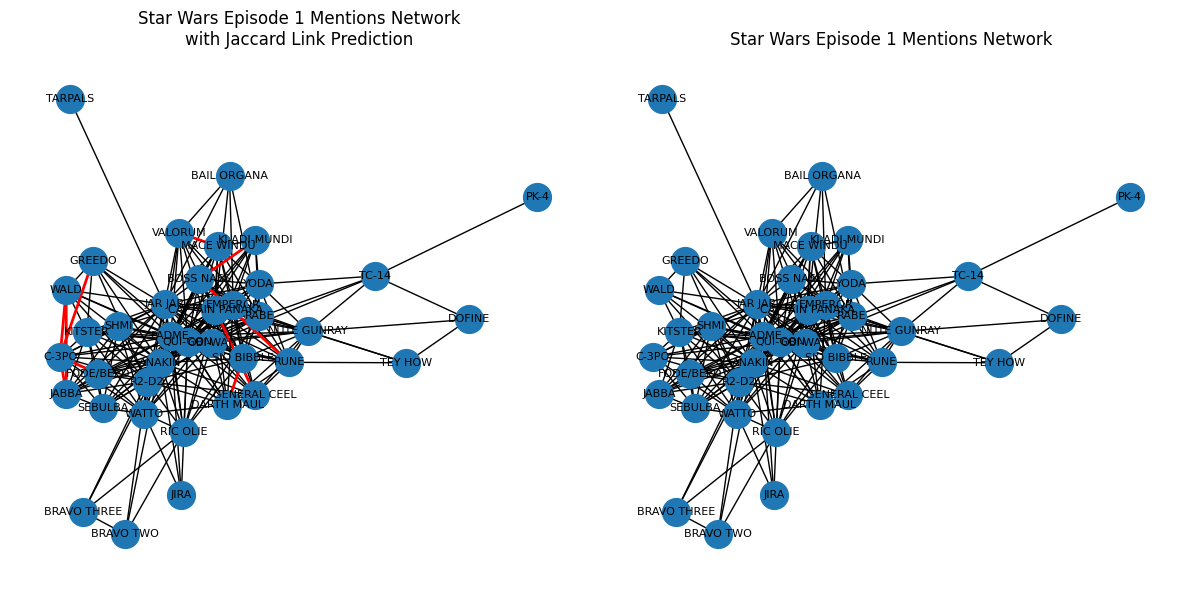

In [61]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)
 
plt.figure(figsize=(12, 6))

# Netzwerk mit Jaccard Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in jaccard_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Mentions Network\nwith Jaccard Link Prediction")

# Netzwerk ohne Link Prediction
plt.subplot(122)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Mentions Network")

# Abbildung anzeigen
plt.tight_layout()  
plt.show()

### 5.8 Link-Predictions auf mentions mit Resource Allocation

In [62]:
with open('data/starwars-episode-1-mentions.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

# für alle links in data_interactions einen Knoten hinzufügen
for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)


# Resource Allocation
ra_scores = list(nx.resource_allocation_index(G))
ra_scores.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Resource Allocation:")
for u, v, score in ra_scores[:10]:
    print(f"{u} - {v}: RA = {score:.4f}")
print(G)

Top 10 Link Predictions basierend auf Resource Allocation:
ANAKIN - RUNE: RA = 0.6010
ANAKIN - NUTE GUNRAY: RA = 0.6010
GENERAL CEEL - PADME: RA = 0.6003
GENERAL CEEL - CAPTAIN PANAKA: RA = 0.6003
SIO BIBBLE - DARTH MAUL: RA = 0.5597
YODA - R2-D2: RA = 0.5525
RUNE - R2-D2: RA = 0.5385
NUTE GUNRAY - R2-D2: RA = 0.5385
BOSS NASS - RUNE: RA = 0.5176
BOSS NASS - NUTE GUNRAY: RA = 0.5176
Graph with 38 nodes and 244 edges


In [63]:
# Welcher NOde kommt wie oft vor in den top 10
top_nodes = [u for u, _, _ in ra_scores[:10]]
top_nodes += [v for _, v, _ in ra_scores[:10]]
top_nodes = dict.fromkeys(top_nodes, 0)

for u, v, _ in ra_scores[:10]:
    top_nodes[u] += 1
    top_nodes[v] += 1

print("Top 10 Nodes in Link Predictions:")

for node, count in sorted(top_nodes.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {count}")

Top 10 Nodes in Link Predictions:
RUNE: 3
NUTE GUNRAY: 3
R2-D2: 3
ANAKIN: 2
GENERAL CEEL: 2
BOSS NASS: 2
SIO BIBBLE: 1
YODA: 1
PADME: 1
CAPTAIN PANAKA: 1
DARTH MAUL: 1


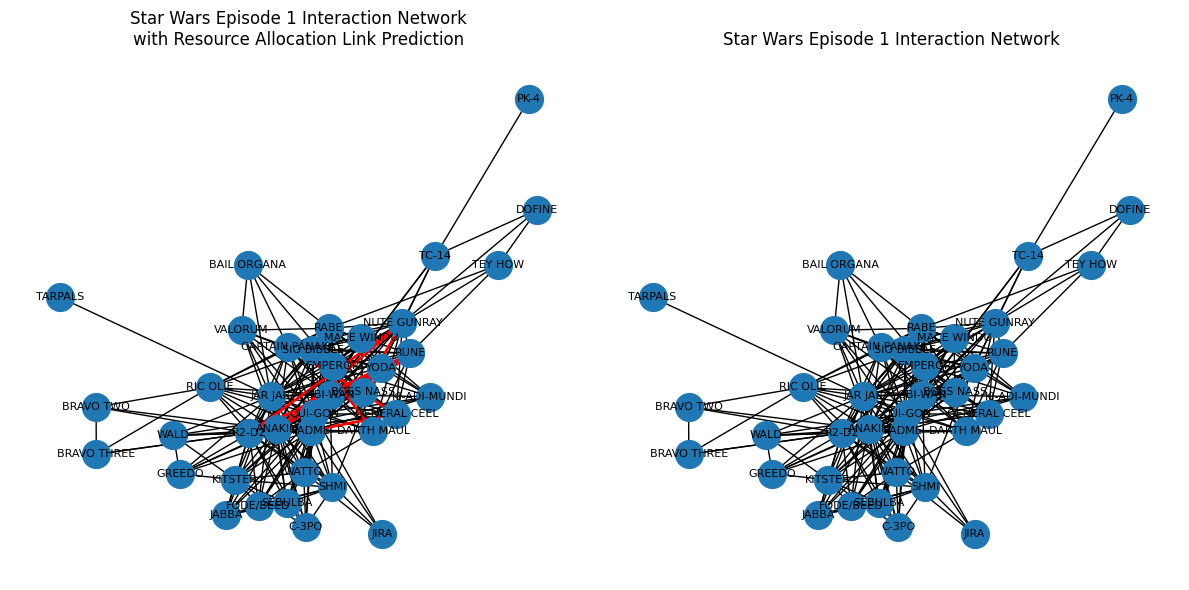

In [64]:
# Positionen der Knoten berechnen
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 6))

# Netzwerk mit RA Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in ra_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Interaction Network\nwith Resource Allocation Link Prediction")

# Netzwerk ohne Link Prediction
plt.subplot(122) 
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Interaction Network")

# plot anzeigen
plt.tight_layout() 
plt.show()

### 5.9 Link-Predictions auf mentions mit Ademic Adar

In [65]:
with open('data/starwars-episode-1-mentions.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)


# Adamic-Adar
aa_scores = list(nx.adamic_adar_index(G))
aa_scores.sort(key=lambda x: x[2], reverse=True)

print("Top 10 Link Predictions basierend auf Adamic-Adar:")
for u, v, score in aa_scores[:10]:
    print(f"{u} - {v}: Adamic-Adar = {score:.4f}")

print(G)

Top 10 Link Predictions basierend auf Adamic-Adar:
ANAKIN - RUNE: Adamic-Adar = 3.7620
ANAKIN - NUTE GUNRAY: Adamic-Adar = 3.7620
GENERAL CEEL - PADME: Adamic-Adar = 3.7592
GENERAL CEEL - CAPTAIN PANAKA: Adamic-Adar = 3.7592
SIO BIBBLE - DARTH MAUL: Adamic-Adar = 3.6693
YODA - R2-D2: Adamic-Adar = 3.6586
RUNE - R2-D2: Adamic-Adar = 3.4013
NUTE GUNRAY - R2-D2: Adamic-Adar = 3.4013
BOSS NASS - RUNE: Adamic-Adar = 3.3595
BOSS NASS - NUTE GUNRAY: Adamic-Adar = 3.3595
Graph with 38 nodes and 244 edges


In [66]:
# Welcher NOde kommt wie oft vor in den top 10
top_nodes = [u for u, _, _ in aa_scores[:10]]
top_nodes += [v for _, v, _ in aa_scores[:10]]
top_nodes = dict.fromkeys(top_nodes, 0)

for u, v, _ in aa_scores[:10]:
    top_nodes[u] += 1
    top_nodes[v] += 1

print("Top 10 Nodes in Link Predictions:")

for node, count in sorted(top_nodes.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {count}")

Top 10 Nodes in Link Predictions:
RUNE: 3
NUTE GUNRAY: 3
R2-D2: 3
ANAKIN: 2
GENERAL CEEL: 2
BOSS NASS: 2
SIO BIBBLE: 1
YODA: 1
PADME: 1
CAPTAIN PANAKA: 1
DARTH MAUL: 1


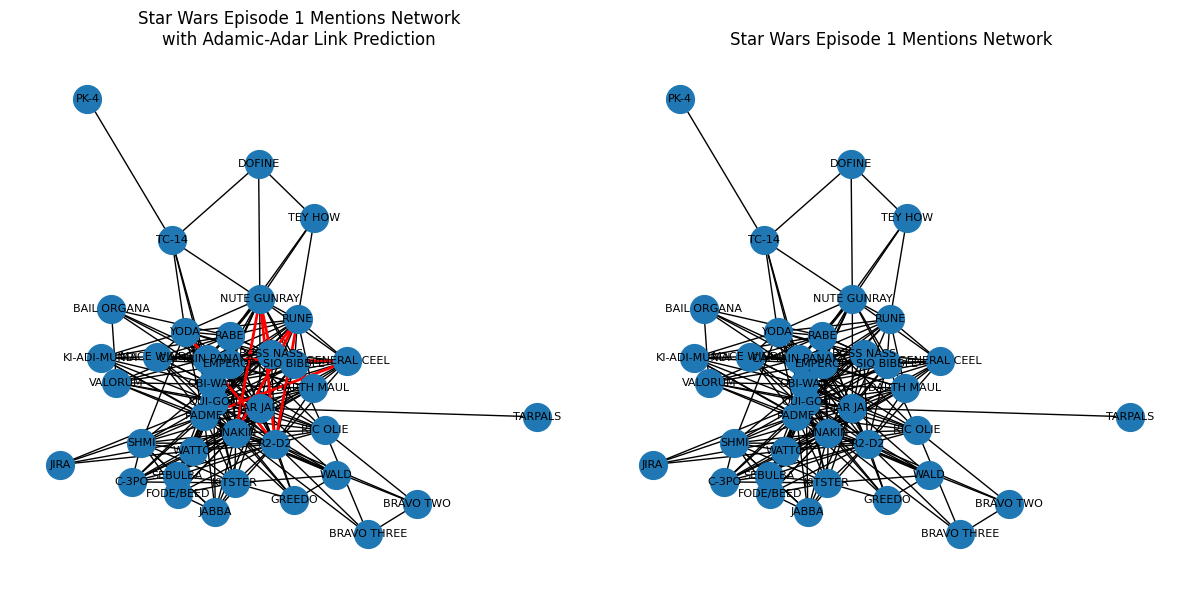

In [67]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 6))

# Netzwerk mit Adamic-Adar Link Prediction
plt.subplot(121)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in aa_scores[:10]], edge_color='r', width=2)
plt.title("Star Wars Episode 1 Mentions Network\nwith Adamic-Adar Link Prediction")

# Netzwerk ohne Link Prediction
plt.subplot(122)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=400)
plt.title("Star Wars Episode 1 Mentions Network")

# plot anzeigen
plt.tight_layout() 
plt.show()

## 5.10 Link-Prediction überprüfen

Die jeweils höchsten Scores und somit die Connections, welche wir überprüfen wollen sind die folgenden: 

NUTE GUNRAY - ANAKIN: gemeinsame Nachbarn = 11

C-3PO - FODE/BEED: Jaccard = 0.8182

ANAKIN - RUNE: RA = 0.6010

ANAKIN - RUNE: Adamic-Adar = 3.7620

In [71]:
with open('data/starwars-full-mentions.json') as f:
    data_interactions = json.load(f)

G = nx.Graph()

# connections für Links hinzufügen
for node in data_interactions['nodes']:
    G.add_node(node['name'])

for link in data_interactions['links']:
    src_id = link['source']
    tgt_id = link['target']
    source_name = data_interactions['nodes'][src_id]['name']
    target_name = data_interactions['nodes'][tgt_id]['name']
    G.add_edge(source_name, target_name)

# checken, ob es verbindungen gibt
print(f"Connection between NUTE GUNRAY and ANAKIN: {G.has_edge('NUTE GUNRAY', 'ANAKIN')}")
print(f"Connection between C-3PO and FODE/BEED: {G.has_edge('C-3PO', 'FODE/BEED')}")
print(f"Connection between ANAKIN and RUNE: {G.has_edge('ANAKIN', 'RUNE')}")
print(G)

Connection between NUTE GUNRAY and ANAKIN: True
Connection between C-3PO and FODE/BEED: False
Connection between ANAKIN and RUNE: True
Graph with 113 nodes and 817 edges


Zwei von den drei geprüften Connections, welche durch die Link-prediction vorhergesagt wurden, sind tätsachlich so entstanden. Dies ist schon mehr als beim Netzwerk mit den Interaktionen.

Auch hier testen wir noch ein paar andere Link-Predictions und sehen uns an, ob es über den Verlauf der sieben Filme tatsächlich zu den Mentions gekommen ist.

In [74]:
print(f"Connection between OBI-WAN and EMPEROR: {G.has_edge('GENERAL CEEL', 'CAPTAIN PANAKA')}")
print(f"Connection between ANAKIN and SIO BIBBLE: {G.has_edge('SIO BIBBLE', 'DARTH MAUL')}")
print(f"Connection between JABBA and KITSTER: {G.has_edge('YODA', 'R2-D2')}")
print(f"Connection between RIC OLIE and PADME: {G.has_edge('RUNE', 'R2-D2')}")
print(f"Connection between OBI-WAN and JABBA: {G.has_edge('BOSS NASS', 'RUNE')}")

Connection between OBI-WAN and EMPEROR: False
Connection between ANAKIN and SIO BIBBLE: False
Connection between JABBA and KITSTER: True
Connection between RIC OLIE and PADME: False
Connection between OBI-WAN and JABBA: False


Hier sehen wir, dass es nur bei einem von fünf vorhergesagten Links tatsächlich zu einer Erwähnung (Mention) gekommen ist.

_edge('NUTE GUNRAY', 'ANAKIN')}")
print(f"Connection between C-3PO and FODE/BEED: {G.has_edge('C-3PO', 'FODE/BEED')}")
print(f"Connection between ANAKIN and RUNE: {G.has_edge('ANAKIN', 'RUNE')}")

### 5.11 Fazit der Link Prediction und Empfehlung an den Imperator

Es ist interessant zu sehen, dass bei den Interaktionen und auch bei den Mentions jeweils nur sehr wenige der vorhergesagten Connections wirklich zu stande gekommen sind. Dies ist wohl ein Exampel dafür, dass eine Link-prediction in der Theorie zwar Sinn ergibt, in der Praxis allerdings recht schwierig vorherzusagen ist. 

Dem Imperator würden wir die Folgenden Charaktere empfehlen zu verbünden: 

Nute Gunray und Jar Jar, da diese den höchsten Wert haben bei Common Neighbours und bei Ademic Adar

Ric Olie und Boss Nass, da diese den höchsten Wert haben beim Jaccard Coefficient. 

Obi-Wan und Rabe, da diese den höchsten Wert haben bei Resource Allocation. 

Die Empfehlung basiert auf den Link-Predictions des Netzwerkes mit den Interaktionen und nicht dem mit den Mentions, da dem Imperator der Informationsfluss wichtig ist. 

## 6 Ausblick

Es gibt noch weitere Möglichkeiten um vortgeschrittenere oder komplexere Netzwerkanalysen durchzuführen. Als nächste Schritte für die Bekämpfung des Imperators gäbe es beispielsweise folgende Techniken.

### 6.1 Öppis ...

### 6.2 Namal öppis

### 6.3 no öppis letschts. 